<a href="https://colab.research.google.com/github/ducbao811/diveintocode-ml/blob/master/Sprint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1 to 5]

In [129]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      Parameters
    self.loss : 次の形のndarray, shape (self.iter,)
      Training dataに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter = 1000, lr = 0.01, no_bias=False, verbose=False):
        # ハイパーParametersを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : 次の形のndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : 次の形のndarray, shape (n_samples, )
            Correct value of verification data
        """
        X1 = self._linear_hypothesis(X)

        # Generate first value for parameters theta, shape (n_features + 1,)
        self.theta = np.random.rand(X1.shape[1])

        for i in range(self.iter):

          y1 = np.dot(X1,self.theta)

          error = y1 - y
          self.loss[i] += np.mean(error**2) / 2

          if X_val is not None:
            X2 = self._linear_hypothesis(X_val)
            y2 = np.dot(X2,self.theta)
            error_val = y2 - y_val
            self.val_loss[i] += np.mean(error_val**2) / 2
          
          self._gradient_descent(X1,error)

          if self.verbose and i % 1000 == 0:
            print("n_iter: {}\n loss: {}\n val_loss: {}\n".format(i,self.loss[i],self.val_loss[i]))

        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = np.dot(self._linear_hypothesis(X),self.theta)
        return y_pred
    
    def _linear_hypothesis(self, X):
      """
      線形の仮定関数を計算する
      Parameters
      ----------
      X : 次の形のndarray, shape (n_samples, n_features)
        Training data
      Returns
      -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
      """

      if self.no_bias:
        bias_cof = np.zeros((X.shape[0],1))
      else:
        bias_cof = np.ones((X.shape[0],1))
      return np.hstack((X,bias_cof))

    def _gradient_descent(self, X, error):
      """
      Updating theta using gradient descent method
      --------
      Parameters:
        error: Error between real value and estimated value, shape (n_samples,)
        X: Features of training data, shape (n_samples, n_features)
      """
      self.theta = self.theta - (self.lr * np.dot(error,X)) / len(X)

In [10]:
def MSE(y_pred, y):
      """
      Calculation of mean square error
      Parameters
      ----------
      y_pred : 次の形のndarray, shape (n_samples,)
        Estimated value
      y : 次の形のndarray, shape (n_samples,)
        Correct answer value
      Returns
      ----------
      mse : numpy.float
        Mean squared error
      """
      mse = np.mean((y_pred - y) ** 2)
      return mse

# [Problem 6]

In [11]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [12]:
# Reading the data
import io
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [16]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
X = df_train[['GrLivArea']]
y = df_train['SalePrice']
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (1460, 1)
y shape: (1460,)


In [99]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.75, random_state = 42)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (1095, 1)
y_train shape: (1095,)
X_valid shape: (365, 1)
y_valid shape: (365,)


In [100]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [103]:
model = ScratchLinearRegression(num_iter=10000,lr=0.05,verbose=True)
model.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred = model.predict(X_valid_std)

n_iter: 0
 loss: 19545289203.39276
 val_loss: 19442237224.313046

n_iter: 1000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 2000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 3000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 4000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 5000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 6000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 7000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 8000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704

n_iter: 9000
 loss: 1577938448.895022
 val_loss: 1559223895.9934704



[]

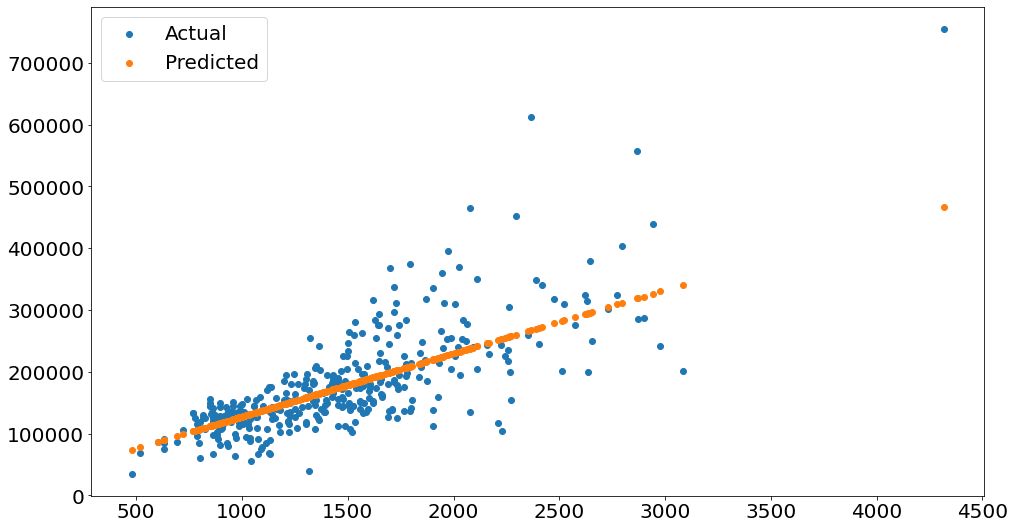

In [104]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(X_valid,y_valid,label="Actual")
plt.scatter(X_valid,y_pred,label="Predicted")
plt.legend()
plt.plot()

In [105]:
print("Mean square error: {}".format(MSE(y_pred,y_valid)))

Mean square error: 3118447791.986941


**Scikit-learn implementation**

In [108]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train_std,y_train)
y_pred_sk = model.predict(X_valid_std)

[]

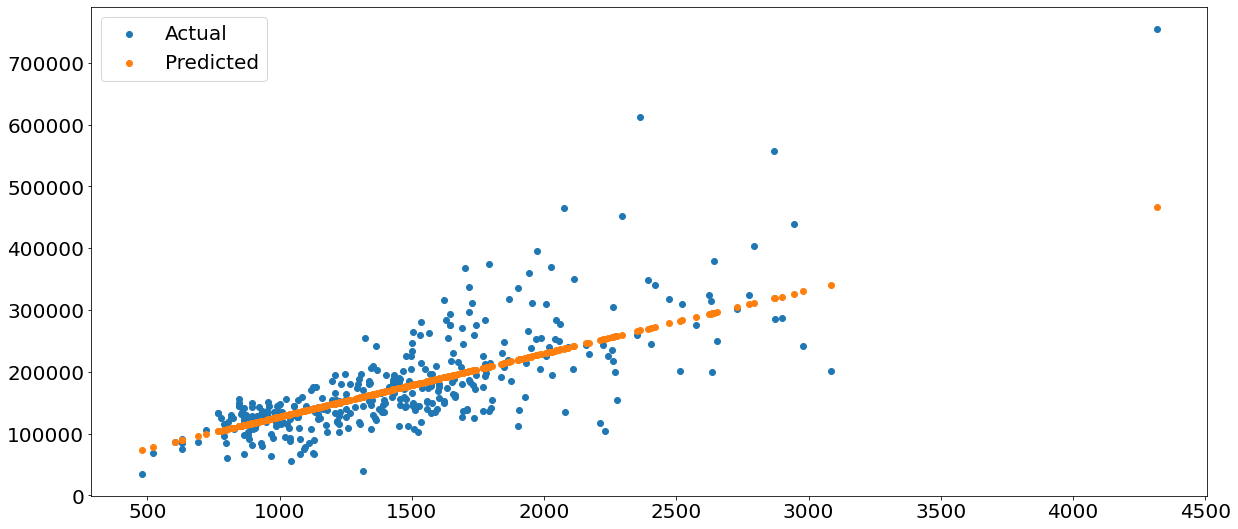

In [119]:
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(X_valid,y_valid,label="Actual")
plt.scatter(X_valid,y_pred_sk,label="Predicted")
plt.legend()
plt.plot()

In [111]:
print("Mean square error of skcit-learn Linear Regression: {}".format(MSE(y_pred,y_test)))

Mean square error of skcit-learn Linear Regression: 3118447791.986941


We can see that the result obtained from scratch-implemented model is the same with Linear Regression model from Sklearn

# [Problem 7]

[]

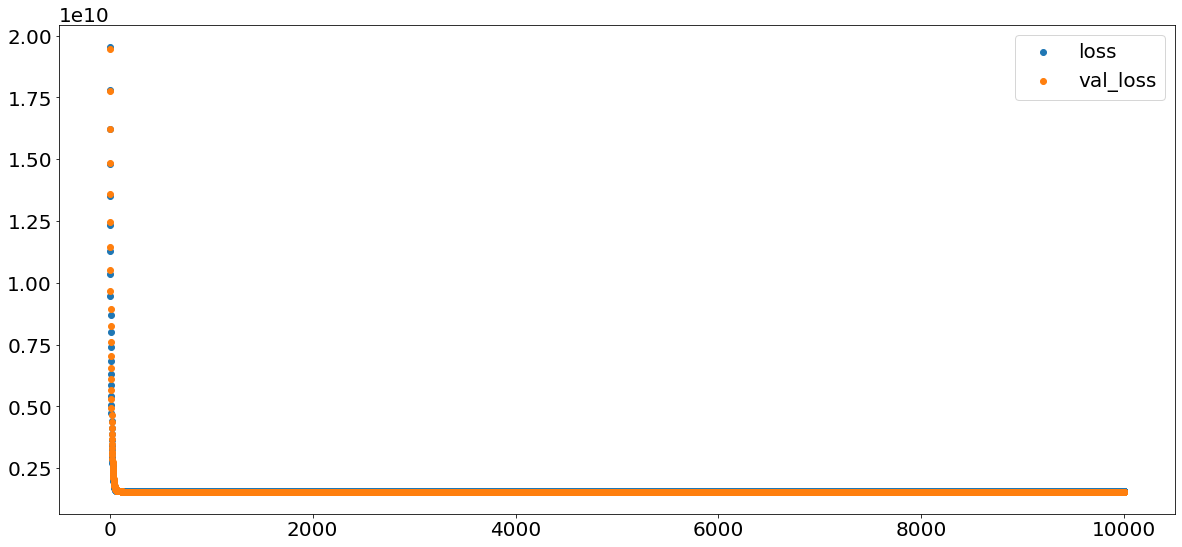

In [118]:
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(range(len(model.loss)),model.loss,label="loss")
plt.scatter(range(len(model.val_loss)),model.val_loss,label="val_loss")
plt.legend()
plt.plot()

# [Problem 8]

In [120]:
model_no_bias = ScratchLinearRegression(num_iter=10000,lr=0.05,verbose=True,no_bias=True)
model_no_bias.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred_no_bias = model_no_bias.predict(X_valid_std)

n_iter: 0
 loss: 19545379127.408623
 val_loss: 19442319109.437237

n_iter: 1000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 2000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 3000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 4000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 5000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 6000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 7000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 8000
 loss: 18087616028.304176
 val_loss: 18666933287.542927

n_iter: 9000
 loss: 18087616028.304176
 val_loss: 18666933287.542927



[]

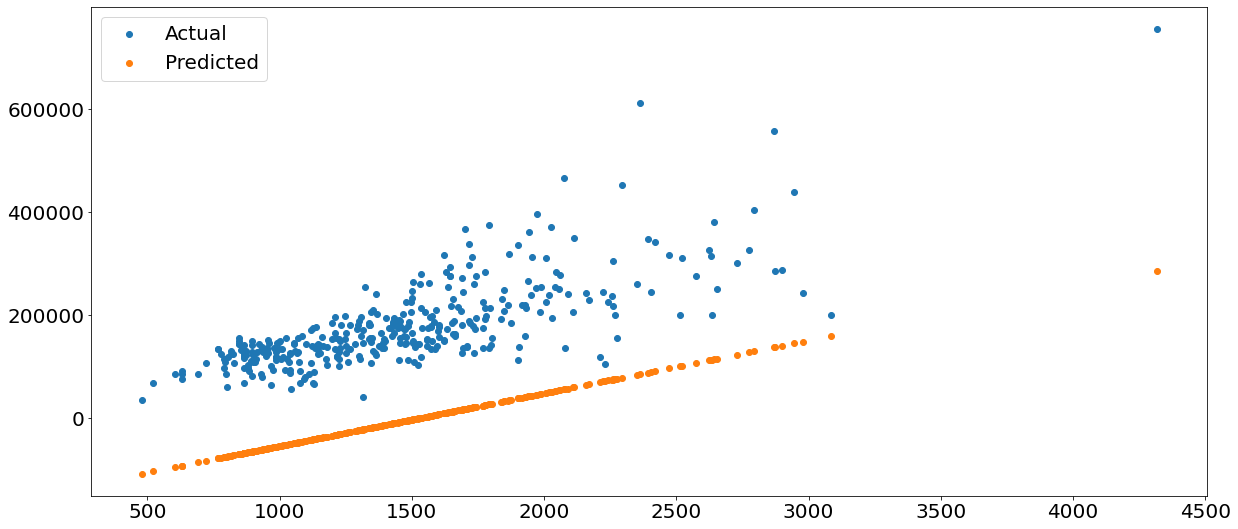

In [121]:
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(X_valid,y_valid,label="Actual")
plt.scatter(X_valid,y_pred_no_bias,label="Predicted")
plt.legend()
plt.plot()

[]

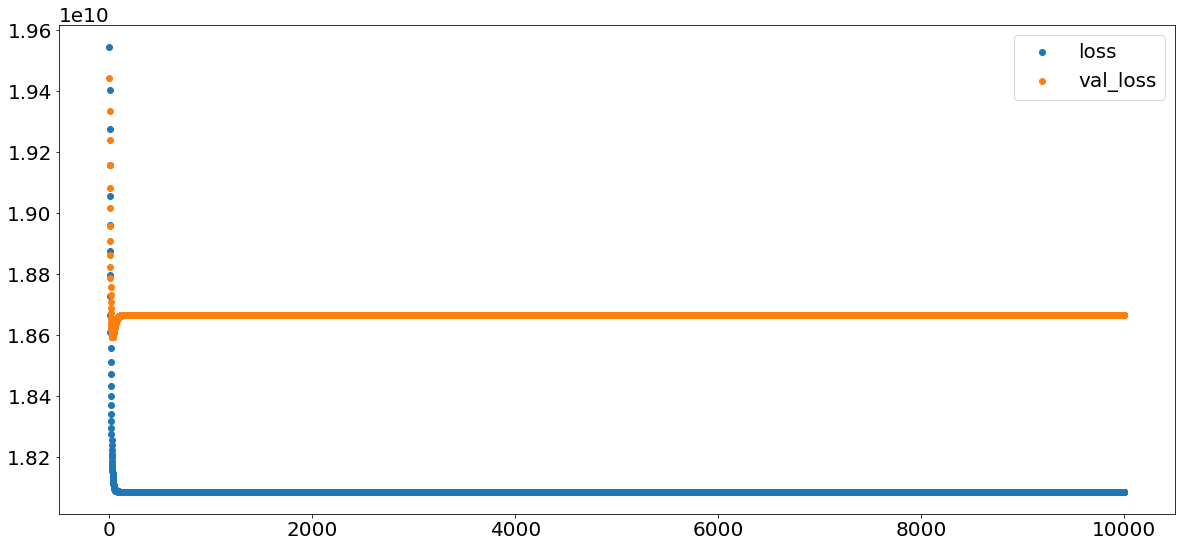

In [123]:
# Learning curve
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(range(len(model_no_bias.loss)),model_no_bias.loss,label="loss")
plt.scatter(range(len(model_no_bias.val_loss)),model_no_bias.val_loss,label="val_loss")
plt.legend()
plt.plot()

In [124]:
print("Mean square error: {}".format(MSE(y_pred_no_bias,y_valid)))

Mean square error: 37333866575.08585


 - After removing the bias term in the model, the accuracy decreased significantly with higher **MSE**. Also, we can see in the graph, the model does not perform well and the line representing the model come through the origin. The learning curve also indicate the worse learning process than previous one.
 - Role of bias term: useful in minimizing errors of the overall model

# [Problem 9]

In [140]:
X_multi = df_train[['GrLivArea','GrLivArea']]
y_multi = df_train['SalePrice']
print("X shape: {}".format(X_multi.shape))
print("y shape: {}".format(y_multi.shape))

X shape: (1460, 2)
y shape: (1460,)


In [141]:
X_train, X_valid, y_train, y_valid = train_test_split(X_multi, y_multi, train_size = 0.75, random_state = 42)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (1095, 2)
y_train shape: (1095,)
X_valid shape: (365, 2)
y_valid shape: (365,)


In [142]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [143]:
# Square feature
X_train_std[:,1] = X_train_std[:,1] ** 2
X_valid_std[:,1] = X_valid_std[:,1] ** 2

In [144]:
model = ScratchLinearRegression(num_iter=10000,lr=0.05,verbose=True)
model.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred = model.predict(X_valid_std)

n_iter: 0
 loss: 19545306006.63841
 val_loss: 19442240791.78654

n_iter: 1000
 loss: 1532996162.1145463
 val_loss: 1623230695.8335462

n_iter: 2000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 3000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 4000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 5000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 6000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 7000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 8000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428

n_iter: 9000
 loss: 1532996162.1145492
 val_loss: 1623230695.8335428



In [145]:
print("Mean square error: {}".format(MSE(y_pred,y_valid)))

Mean square error: 3246461391.6670856


[]

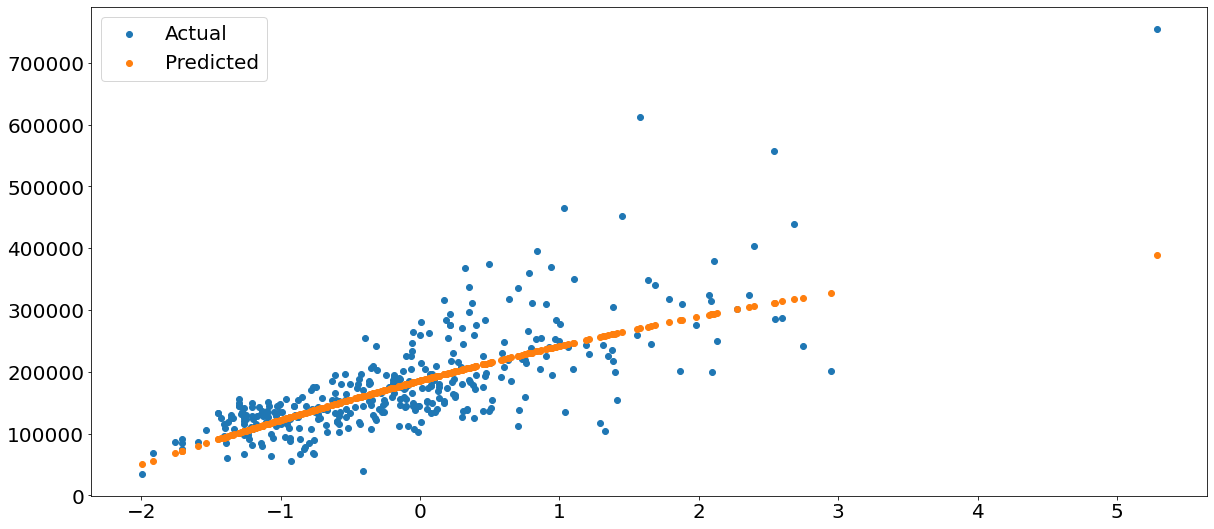

In [148]:
fig, ax = plt.subplots(figsize=(20,9))
plt.scatter(X_valid_std[:,0],y_valid,label="Actual")
plt.scatter(X_valid_std[:,0],y_pred,label="Predicted")
plt.legend()
plt.plot()

A slight improvement can be seen the perfomance of the model as MSE decreases and also the model fits well to the valid data.